<h1> <b> Car Body Parts Localization </b> <h1>

This notebook aims to build object detector model for car body parts, as a step of a car damage detection pipeline.

<h2>Dataset Sources<h2>


1.   [DSMLR Body Parts Segmentation Dataset.](https://github.com/dsmlr/Car-Parts-Segmentation)
2.   [CompCars Dataset.](http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/)
3.   [Stanford Cars Dataset.](https://ai.stanford.edu/~jkrause/cars/car_dataset.html)
4.   [Used cars Auction Nation live auctions.](https://www.auctionnation.co.za/)

<h3>Dataset Labels<h5>

  ```
    0: _background_
    1: rear_bumper
    2: rear_glass
    3: rear_door
    4: rear_light
    5: front_bumper
    6: front_glass
    7: front_door
    8: front_light
    9: hood
    10: side_mirror
    11: trunk
    12: wheel
    13: rear_fender
    14: front_fender
  ```

<h2>Approach<h2>

1.   The data collected from sources 2-4 were manually annotated using [Microsoft VOTT](https://github.com/microsoft/VoTT).
2.   Annotations from source 1 were edited and the labels out of intreset were removed.
3.   Data was splitted over train, validation, and test.
4.   Transfer learning was deployed as Yolov5 state-of-the-art object detection CNNs were tuned and trained.

<h2>Setup<h2>

1.   Arrange the dataset in the following structure.
```
carDamageDataset
|
|_ train
|    |
|    |_ labels 
|    |      |_ .txt train images labels
|    |
|    |_ images 
|           |_ .jpg/.JPEG test images
|
|_ test / val (same as train)
```    
2.   Clone Yolov5 GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.
3.   Create the data.yaml for the dataset location and labels.
4.   Edit the global variables and run the notebook.


# **Code**

## Yolov5 Setup

Clone Yolov5 repo from Github.



In [48]:
#!git clone https://github.com/ultralytics/yolov5 

## Yolov5 reposatory was cloned and saved to locally for fast access.
%cd F:/BodyPartsModel

F:\BodyPartsModel


Access yolov5 folder and install the requirments.

In [49]:
%cd yolov5

# %pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  2022-12-15 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)


Setup complete  (16 CPUs, 31.7 GB RAM, 15.7/665.1 GB disk)


## Global Paths

In [63]:
project_name = r"F:\BodyPartsModel\FinalSubmission"
test_imgs_path = r"F:\BodyPartsModel\dataset\test\images"
evolve_folder = "evolve/nano_ep5_b16_evolve5"
train_folder = "train/nano_bestHyp_ep100_b16"
train_folder_aug = "train/nano_bestHyp_ep100_b16_aug"
train_folder_v8 = "train/nano_bestHyp_ep100_b16_v8"
detect_folder = "predict/nano_bestHyp_ep100_b16_aug"

## Model Tune

In [18]:
!python train.py --img 640 --batch 16 --epochs 5 --data body_parts.yaml --weights yolov5n6.pt --project {project_name} --name {evolve_folder} --evolve 5

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Best results from row 4 of F:\BodyPartsModel\FinalSubmission\evolve\nano_ep5_b16_evolve5\evolve.csv:
            lr0: 0.0104
            lrf: 0.0107
       momentum: 0.941
   weight_decay: 0.00052
  warmup_epochs: 3.38
warmup_momentum: 0.839
 warmup_bias_lr: 0.104
            box: 0.05
            cls: 0.5
         cls_pw: 0.978
            obj: 1.13
         obj_pw: 0.971
          iou_t: 0.2
       anchor_t: 3.51
       fl_gamma: 0
          hsv_h: 0.0156
          hsv_s: 0.7
          hsv_v: 0.411
        degrees: 0
      translate: 0.117
          scale: 0.52
          shear: 0
    perspective: 0
         flipud: 0
         fliplr: 0.5
         mosaic: 1
          mixup: 0
     copy_paste: 0
        anchors: 2.41
Saved F:\BodyPartsModel\FinalSubmission\evolve\nano_ep5_b16_evolve5\evolve.png


train: weights=yolov5n6.pt, cfg=, data=body_parts.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=5, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=F:\BodyPartsModel\FinalSubmission, name=evolve/nano_ep5_b16_evolve5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-12-15 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

## Model Train

Train YOLOv5 nano model on body_parts_dataset for 200 epochs.

In [55]:
# Path to best hyper parameters exported through the evolving.
best_hyp_path = f"{project_name}/{evolve_folder}/hyp_evolve.yaml"

train time 17m 31.9s

In [56]:
# Change yolo5x([n,s,m,l,x]).pt to upgrade the size of the model.
!python train.py --img 640 --batch 16 --epochs 100 --data body_parts.yaml --weights yolov5n6.pt --hyp {best_hyp_path} --project {project_name} --name {train_folder} --patience 50

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5n6.pt, cfg=, data=body_parts.yaml, hyp=F:\BodyPartsModel\FinalSubmission/evolve/nano_ep5_b16_evolve5/hyp_evolve.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=F:\BodyPartsModel\FinalSubmission, name=train/nano_bestHyp_ep100_b16, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-12-15 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

hyperparameters: lr0=0.01042, lrf=0.0107, momentum=0.94061, weight_decay=0.00052, warmup_epochs=3.3836, warmup_momentum=0.83855, warmup_bias_lr=0.10427, box=0.05, cls=0.5, cls_pw=0.97825, obj=1.128, obj_pw=0.97131, iou

## Model Train with Augmentation

train time 32m 27.1s

In [57]:
!python train.py --img 640 --batch 16 --epochs 100 --data body_parts_aug.yaml --weights yolov5n6.pt --hyp {best_hyp_path} --project {project_name} --name {train_folder_aug} --patience 50

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5n6.pt, cfg=, data=body_parts_aug.yaml, hyp=F:\BodyPartsModel\FinalSubmission/evolve/nano_ep5_b16_evolve5/hyp_evolve.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=F:\BodyPartsModel\FinalSubmission, name=train/nano_bestHyp_ep100_b16_aug, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=50, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-12-15 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

hyperparameters: lr0=0.01042, lrf=0.0107, momentum=0.94061, weight_decay=0.00052, warmup_epochs=3.3836, warmup_momentum=0.83855, warmup_bias_lr=0.10427, box=0.05, cls=0.5, cls_pw=0.97825, obj=1.128, obj_pw=0.97

## Model Train with YOLOv8

In [58]:
# Pip install method (recommended)
%cd ..
%cd F:/BodyPartsModel/yolov8
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.5  Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 15.8/665.1 GB disk)


In [59]:
# Git clone method (for development)

!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.


In [60]:
%cd F:/BodyPartsModel/yolov8/ultralytics/ultralytics

F:\BodyPartsModel\yolov8\ultralytics\ultralytics


In [61]:
yaml_path=r"F:\BodyPartsModel\yolov5\data\body_parts_aug.yaml"


In [62]:
!yolo task=detect mode=train model=yolov8n.pt data={yaml_path} epochs=100 imgsz=640 project={project_name} name={train_folder_v8}

Ultralytics YOLOv8.0.5  Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=F:\BodyPartsModel\yolov5\data\body_parts_aug.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=F:\BodyPartsModel\FinalSubmission, name=train/nano_bestHyp_ep100_b16_v8, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False

## Model Test

In [66]:
# Path to best weights exported through the training.
%cd ..
%cd F:/BodyPartsModel/yolov5
best_model_path = f"{project_name}/{train_folder_aug}/weights/best.pt"

F:\BodyPartsModel\yolov8\ultralytics
F:\BodyPartsModel\yolov5


In [67]:
!python detect.py --weights {best_model_path} --img 640 --conf 0.25 --source {test_imgs_path} --project {project_name} --name {detect_folder}

detect: weights=['F:\\BodyPartsModel\\FinalSubmission/train/nano_bestHyp_ep100_b16_aug/weights/best.pt'], source=F:\BodyPartsModel\dataset\test\images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=F:\BodyPartsModel\FinalSubmission, name=predict/nano_bestHyp_ep100_b16_aug, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2022-12-15 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 206 layers, 3101424 parameters, 0 gradients, 4.3 GFLOPs
image 1/219 F:\BodyPartsModel\dataset\test\images\027a37b0c2b4332.jpg: 320x640 1 rear_bumper, 1 rear_door, 1 rear_light, 1 front_bumper, 1 front_door, 1 front_light, 1 side_mirror, 2 wheels, 1 rear_fender, 1 front_fe

# **Results**

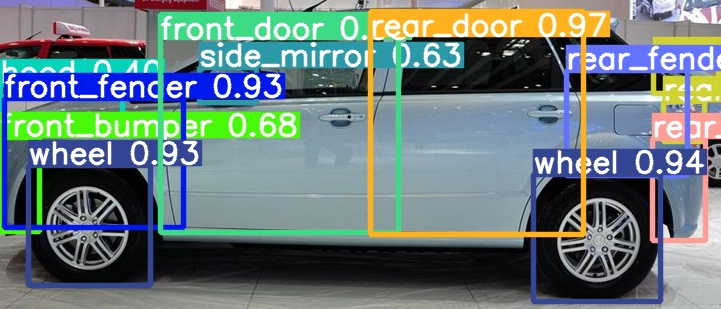

In [70]:
display.Image(filename=r'F:\BodyPartsModel\FinalSubmission\predict\nano_bestHyp_ep100_b16_aug\96a2a575528f50.jpg', width=600)

                              *******Model Confusion Matrix*******


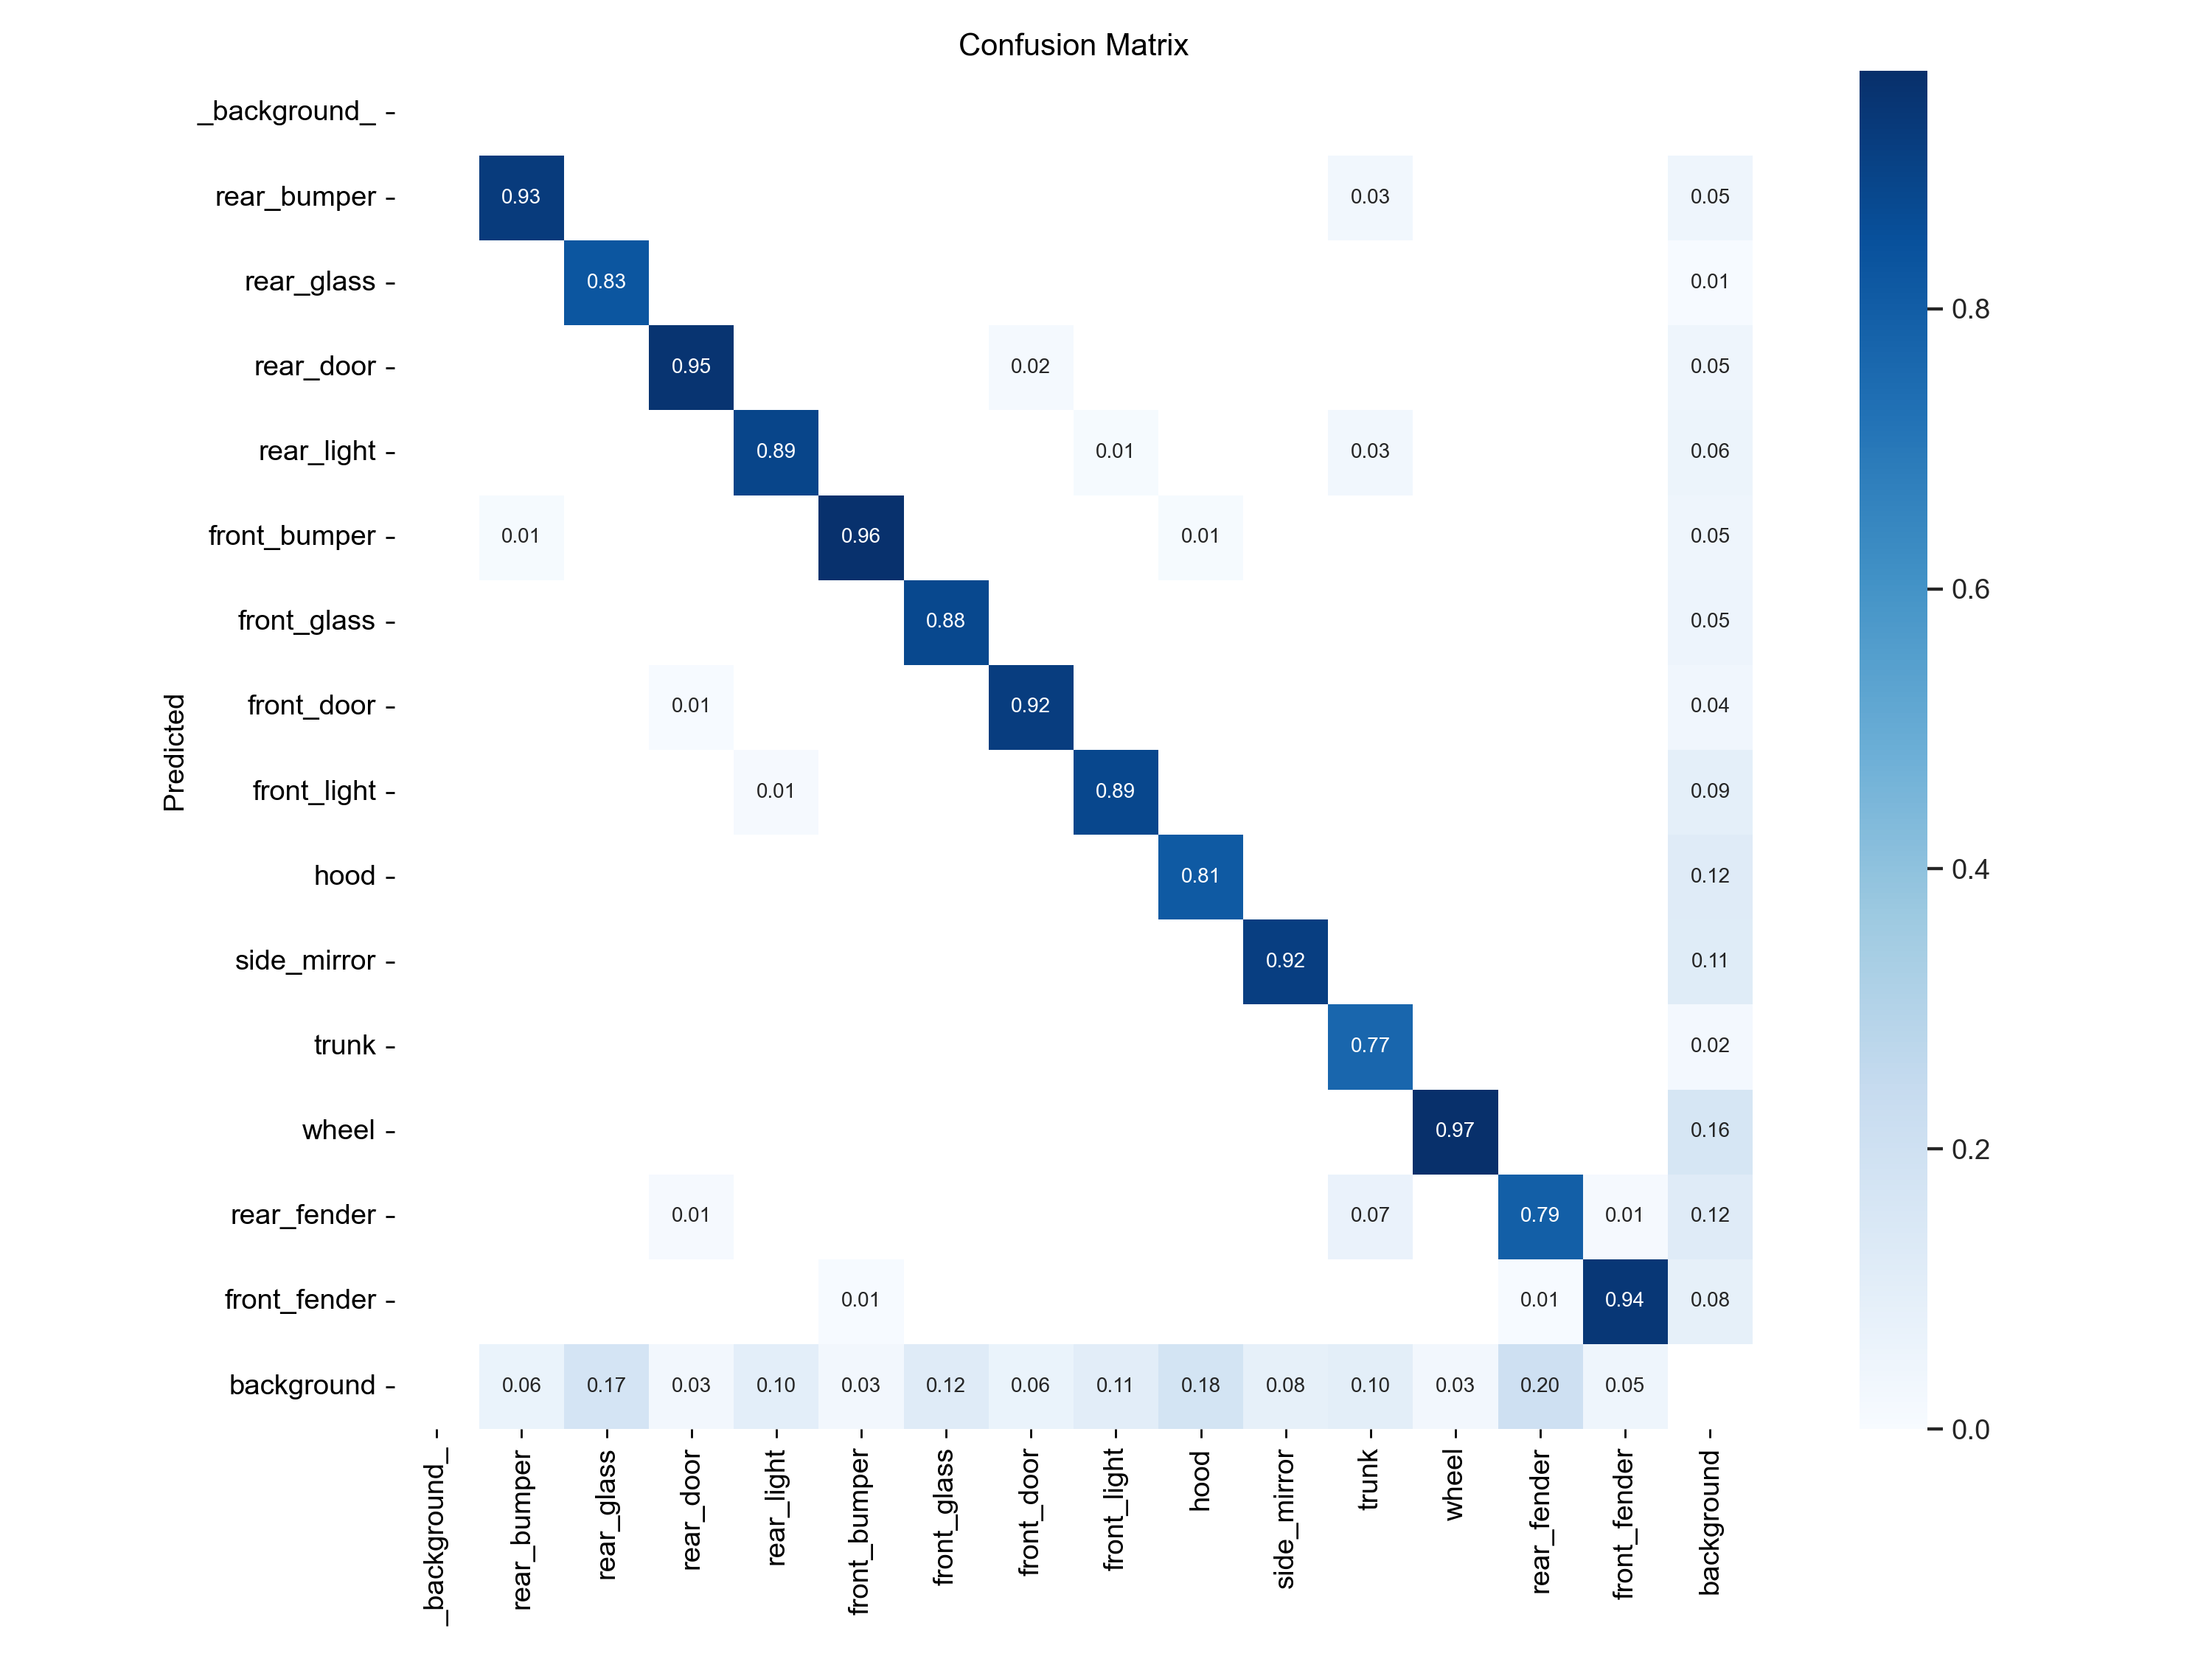

In [83]:
print("                              *******Model Confusion Matrix*******")
display.Image(filename=r'F:\BodyPartsModel\FinalSubmission\train\nano_bestHyp_ep100_b16\confusion_matrix.png', width=800)

                              *******Augmanted Model Confusion Matrix*******


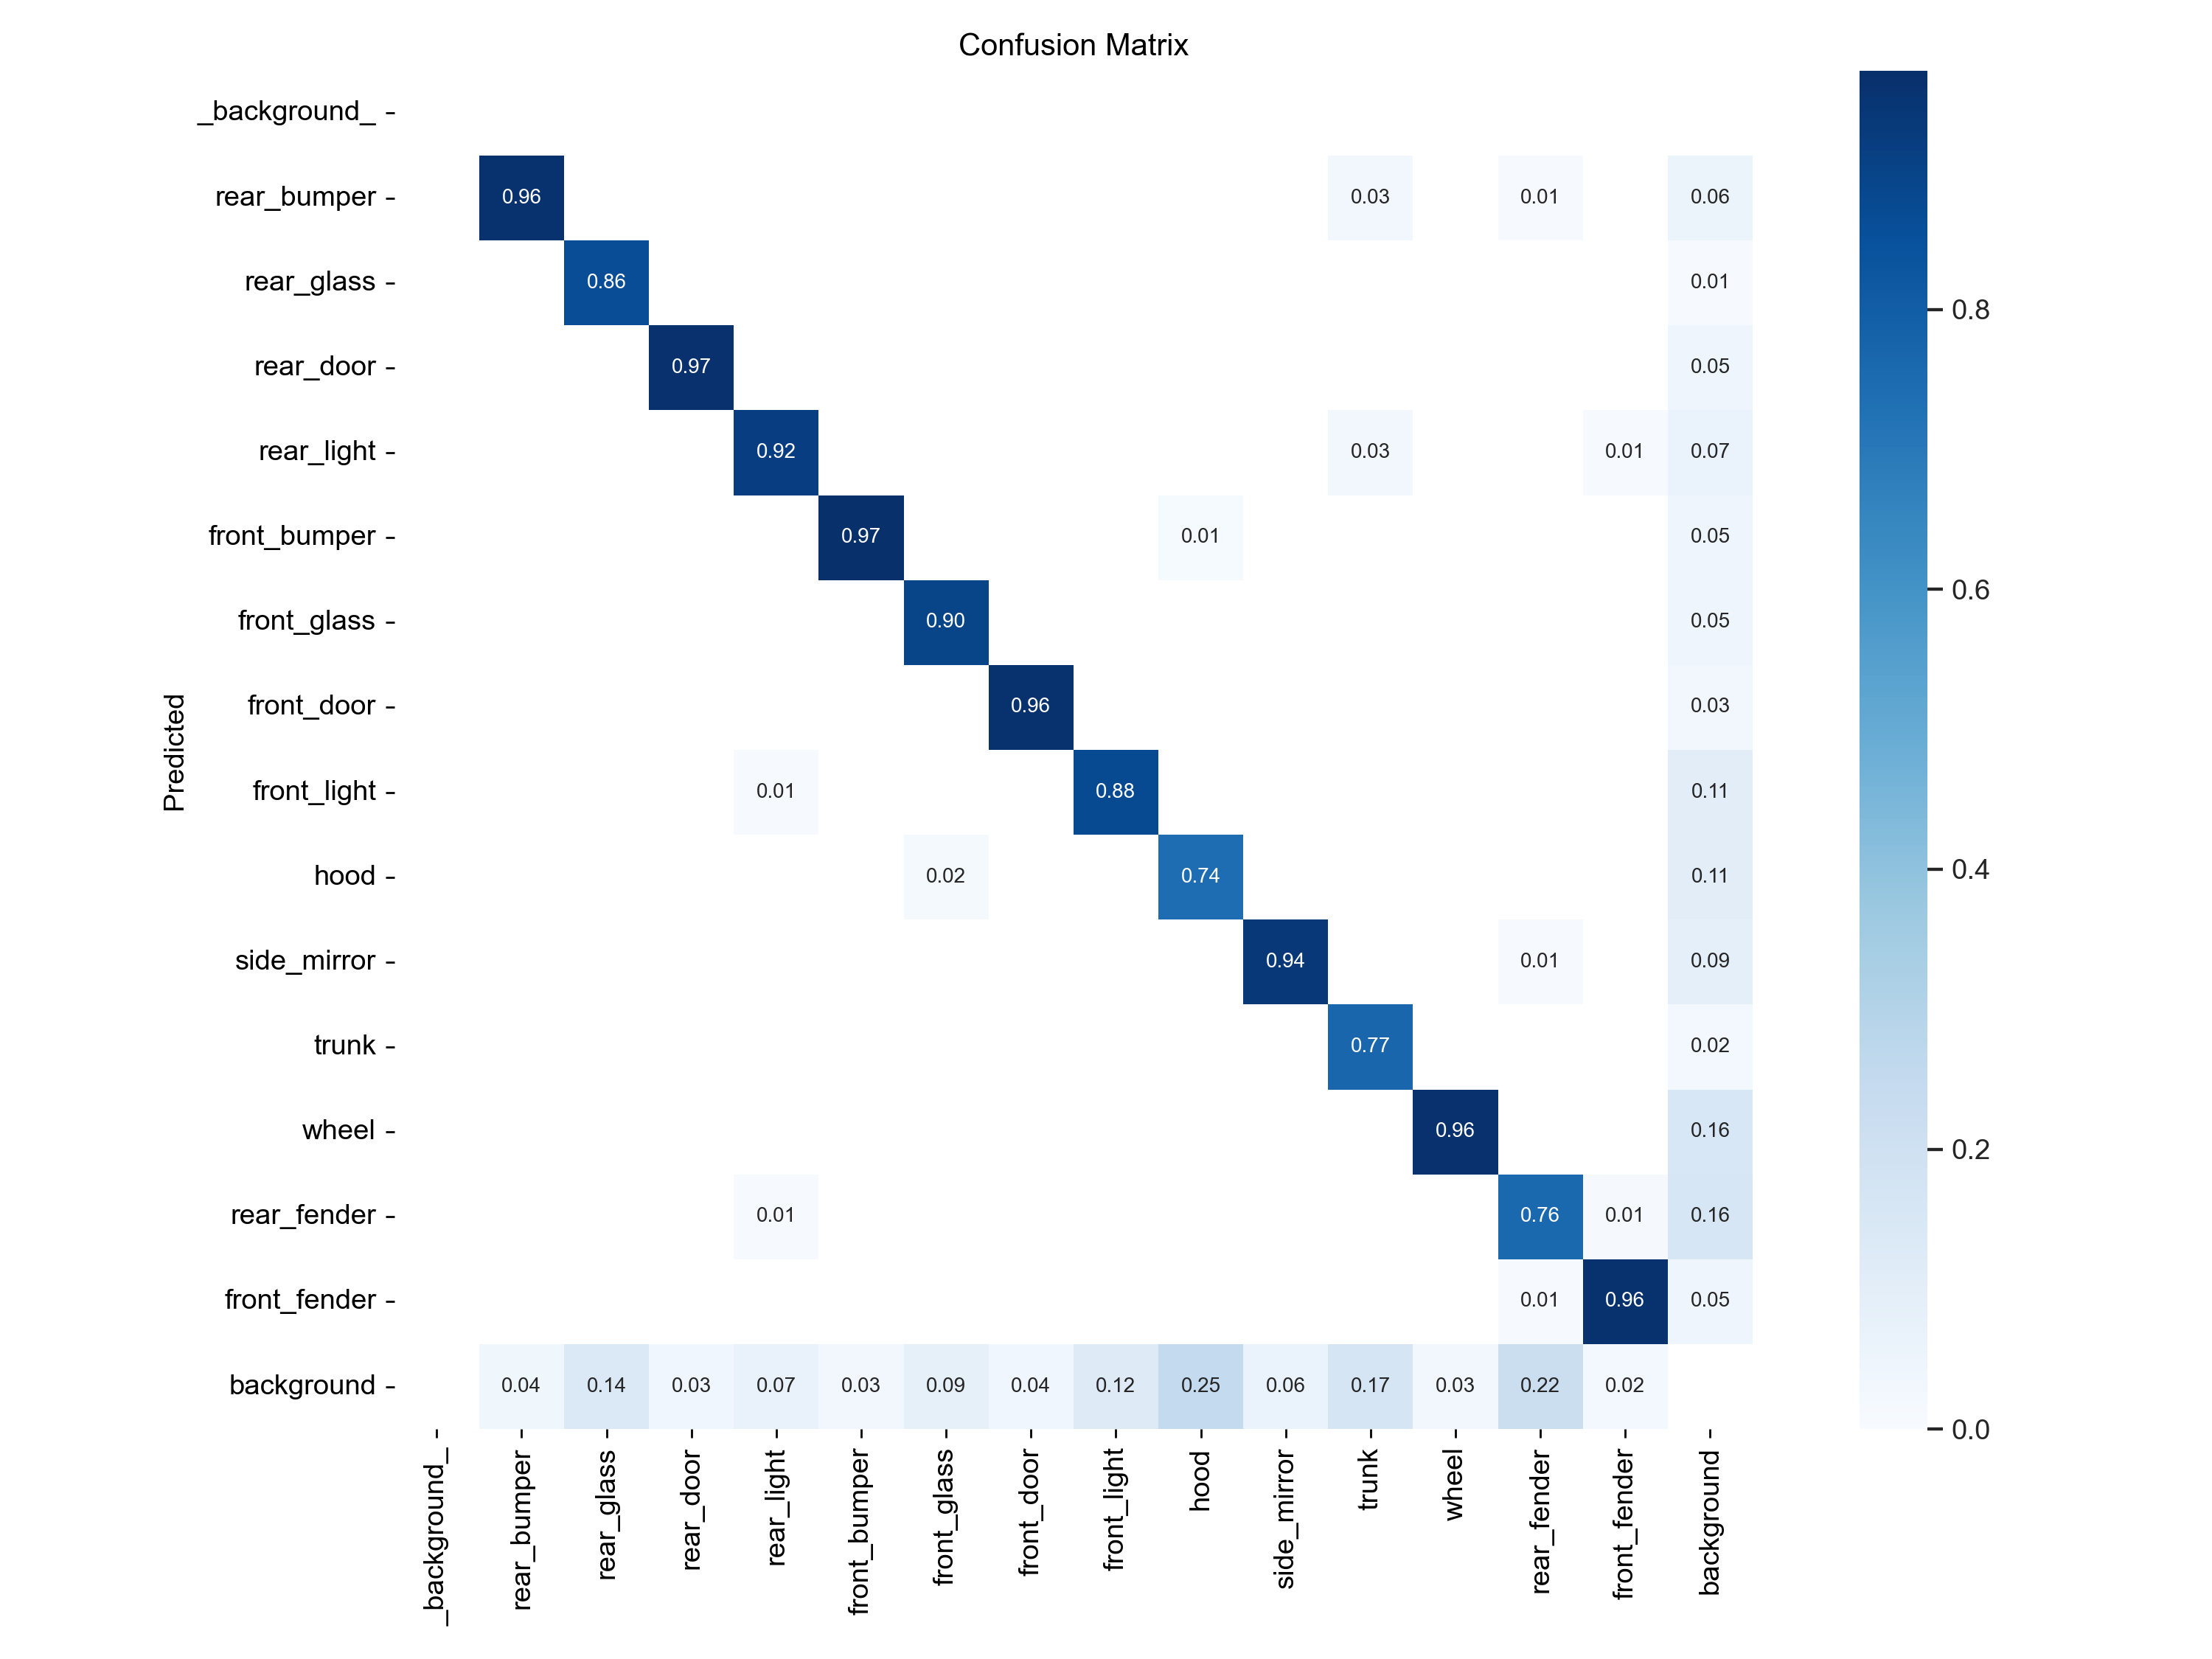

In [84]:
print("                              *******Augmanted Model Confusion Matrix*******")
display.Image(filename=r'F:\BodyPartsModel\FinalSubmission\train\nano_bestHyp_ep100_b16_aug\confusion_matrix.png', width=800)

                              *******Yolov8 Model Confusion Matrix*******


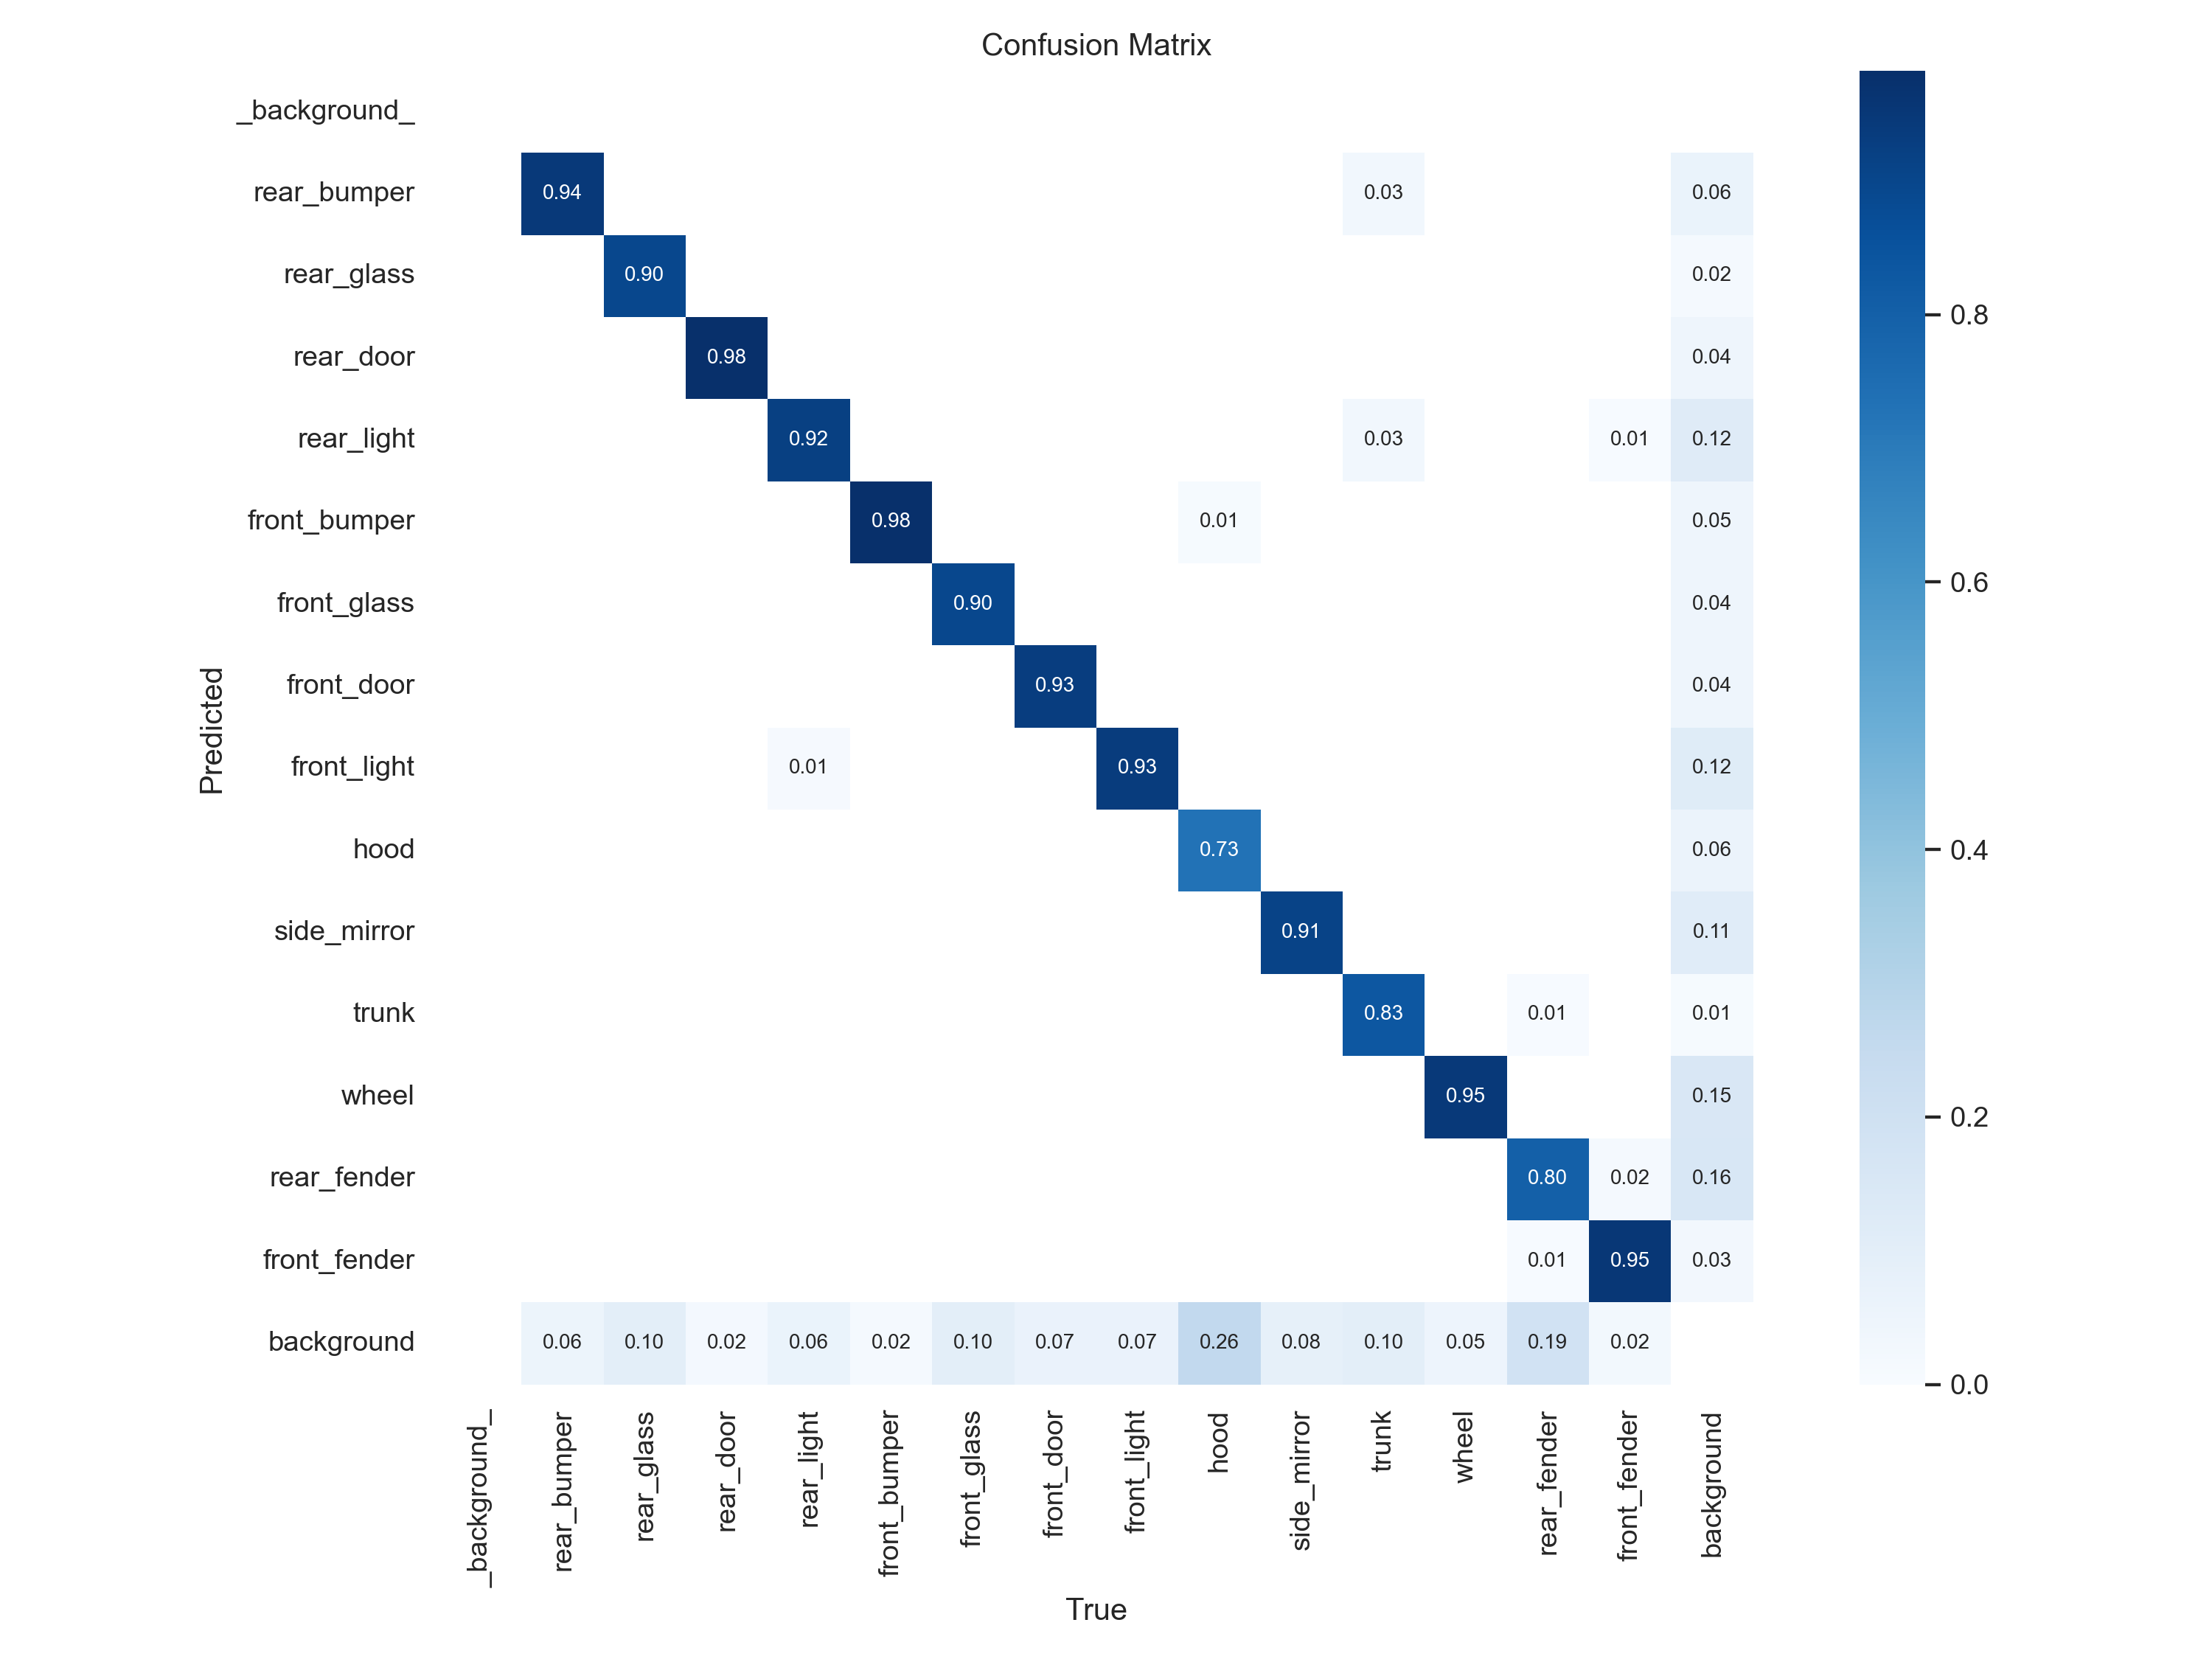

In [85]:
print("                              *******Yolov8 Model Confusion Matrix*******")
display.Image(filename=r'F:\BodyPartsModel\FinalSubmission\train\nano_bestHyp_ep100_b16_v8\confusion_matrix.png', width=800)

# <h2>**References**


1.   Pasupa, K., Kittiworapanya, P., Hongngern, N., & Woraratpanya, K. (2021). Evaluation of deep learning algorithms for semantic segmentation of car parts. Complex & Intelligent Systems, 1–13. doi: 10.1007/s40747-021-00397-8.
2.   Yang, L., Luo, P., Loy, C.C., Tang, X. (2015). A Large-Scale Car Dataset for Fine-Grained Categorization and Verification. Computer Vision and Pattern Recognition (CVPR).
3.   Krause, J., Stark, M., Deng, J., & Fei-Fei, L. (2013). 3D Object Representations for Fine-Grained Categorization. 4th International IEEE Workshop on 3D Representation and Recognition (3dRR-13).
4.   Jocher, G. (2020). ultralytics/yolov5: v3.1 - Bug Fixes and Performance Improvements (v3.1) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.4154370)

